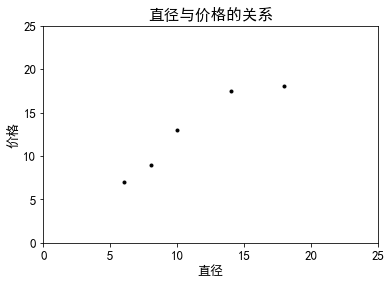

In [224]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
X = np.array([[6],[8],[10],[14],[18]])
y = [7,9,13,17.5,18]
# 设置绘图字体以及正常显示中文，负号
plt.rc('font',family="SimHei",size=13)
plt.rcParams['axes.unicode_minus'] = False
plt.figure()
plt.title(u'直径与价格的关系')
plt.xlabel(u'直径')
plt.ylabel(u'价格')
plt.plot(X,y,'k.')
plt.axis([0,25,0,25])
plt.grid=True
plt.show()

In [225]:
# 创建简单线性拟合模型
model = LinearRegression()
model.fit(X,y)
# 进行一次简单的预测
r = np.random.randint(1,30)
test = np.array([[r]])
price = model.predict(test)
print("直径为%s的披萨价格为%.2f"%(r,price))

直径为24的披萨价格为25.40


# 使用代价函数对模型进行修改

In [231]:
# 残差平方和(RSS)代价函数
# 利用预测值与真实值的差值来计算
loss = np.mean((model.predict(X)-y)**2)
print("该模型残差平方和（即损失函数值）为%f" % loss)

该模型残差平方和为1.749569


若让残差平方和值最小，那么每个预测值就越准确！
而简单线性回归方程为y = aX+b

In [257]:
# 利用numpy求方差，同时利用参数ddof进行贝塞尔校正
variance = np.var(X,ddof=1)
# 利用numpy求x，y的协方差(协方差：变量一起增加，协方差为正；一个变量减小，另一个增大，协方差为负)
covariance = np.cov(X.transpose(),y)[0][1]
# np.cov函数返回数组，[0][1]为协方差，
print("X方差为:{0}\n协方差为:{1}".format(variance,covariance))

X方差为:23.2
协方差为:22.650000000000002


利用公式a = cov(x,y)/var(x)求得a，再利用线性关系y_bar = a*x_bar+b求得b

In [265]:
x_bar = X.mean()
y_bar = np.mean(y)
a = covariance/variance
w = y_bar-x_bar*(a)

[9.775862068965518,
 10.752155172413794,
 12.704741379310345,
 17.586206896551726,
 13.681034482758623]

In [ ]:
评估模型：利用皮尔逊相关系数即用：1 -（真实值-均值）**2/RSS

In [266]:
def test_result(circles):
    results = []
    for i in circles:
        results.append(a*i+w)
    return results
x_test = [8,9,11,16,12]
y_test = test_result(x_test)
r_squared = model.score(np.array(x_test).reshape(-1,1),y_test)
r_squared

1.0